1. Preparar el entorno

In [16]:
# Instalar librerías necesarias
!pip install pandas scikit-learn xgboost matplotlib seaborn kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Descargar y cargar el dataset

In [17]:
import kagglehub

# Descargar dataset EPL
path = kagglehub.dataset_download("marcohuiii/english-premier-league-epl-match-data-2000-2025")



Using Colab cache for faster access to the 'english-premier-league-epl-match-data-2000-2025' dataset.


In [18]:
import os

print("Archivos disponibles:")
print(os.listdir(path))


Archivos disponibles:
['epl_final.csv']


In [19]:
# Cargar CSV principal
df = pd.read_csv(path + "/epl_final.csv")  # Ajusta el nombre exacto del archivo
df.head()

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0


In [20]:
df.columns

Index(['Season', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
       'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
       'HomeRedCards', 'AwayRedCards'],
      dtype='object')

3. Explorar y limpiar datos
- Revisar columnas: equipos, goles, temporada, resultados.
- Crear variables derivadas:
- Puntos por partido (3 victoria, 1 empate, 0 derrota).
- Diferencia de goles.
- Rendimiento local vs visitante.


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Season             9380 non-null   object
 1   MatchDate          9380 non-null   object
 2   HomeTeam           9380 non-null   object
 3   AwayTeam           9380 non-null   object
 4   FullTimeHomeGoals  9380 non-null   int64 
 5   FullTimeAwayGoals  9380 non-null   int64 
 6   FullTimeResult     9380 non-null   object
 7   HalfTimeHomeGoals  9380 non-null   int64 
 8   HalfTimeAwayGoals  9380 non-null   int64 
 9   HalfTimeResult     9380 non-null   object
 10  HomeShots          9380 non-null   int64 
 11  AwayShots          9380 non-null   int64 
 12  HomeShotsOnTarget  9380 non-null   int64 
 13  AwayShotsOnTarget  9380 non-null   int64 
 14  HomeCorners        9380 non-null   int64 
 15  AwayCorners        9380 non-null   int64 
 16  HomeFouls          9380 non-null   int64 


In [27]:
df.describe()

,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,home_points,away_points
count,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000
mean,1.535394,1.182623,0.688273,0.518763,13.617484,10.810661,5.973134,4.693710,6.040299,4.774733,11.276333,11.765672,1.468124,1.792431,0.062473,0.085288,1.621535,1.131876
std,1.305432,1.157414,0.835079,0.735357,5.356424,4.696501,3.267954,2.750045,3.110619,2.749541,3.750250,3.924179,1.217190,1.288481,0.253221,0.290183,1.319939,1.273374
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000,3.000000,3.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,37.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000,3.000000,3.000000


In [28]:
# ============================================
# 1. Calcular puntos por partido
# ============================================
# FullTimeResult: H = gana local, D = empate, A = gana visitante
df['home_points'] = df['FullTimeResult'].map({'H':3, 'D':1, 'A':0})
df['away_points'] = df['FullTimeResult'].map({'A':3, 'D':1, 'H':0})

# ============================================
# 2. Construir tabla de temporada/equipo
# ============================================
home_stats = df.groupby(['Season','HomeTeam']).agg({
    'home_points':'sum',
    'FullTimeHomeGoals':'sum',
    'FullTimeAwayGoals':'sum'
}).reset_index().rename(columns={
    'HomeTeam':'Team',
    'FullTimeHomeGoals':'Goals_For',
    'FullTimeAwayGoals':'Goals_Against'
})

away_stats = df.groupby(['Season','AwayTeam']).agg({
    'away_points':'sum',
    'FullTimeAwayGoals':'sum',
    'FullTimeHomeGoals':'sum'
}).reset_index().rename(columns={
    'AwayTeam':'Team',
    'FullTimeAwayGoals':'Goals_For',
    'FullTimeHomeGoals':'Goals_Against'
})

season_stats = pd.concat([home_stats, away_stats])
season_stats = season_stats.groupby(['Season','Team']).sum().reset_index()

# Diferencia de goles
season_stats['Goal_Diff'] = season_stats['Goals_For'] - season_stats['Goals_Against']

# ============================================
# 3. Etiquetar campeón
# ============================================
season_stats['Rank'] = season_stats.groupby('Season')['home_points'].rank(method='first', ascending=False)
season_stats['Champion'] = (season_stats['Rank'] == 1).astype(int)

# ============================================
# 4. Dataset para ML
# ============================================
X = season_stats[['home_points','Goals_For','Goal_Diff']]
y = season_stats['Champion']

In [38]:
season_stats.head()

,Season,Team,home_points,Goals_For,Goals_Against,away_points,Goal_Diff,Rank,Champion
0,2000/01,Arsenal,48.0,63,38,22.0,25,1.0,1
1,2000/01,Aston Villa,32.0,46,43,22.0,3,13.0,0
2,2000/01,Bradford,19.0,30,70,7.0,-40,17.0,0
3,2000/01,Charlton,38.0,50,57,14.0,-7,6.0,0
4,2000/01,Chelsea,42.0,68,45,19.0,23,4.0,0


In [45]:
print(season_stats['Season'].unique())


['2000/01' '2001/02' '2002/03' '2003/04' '2004/05' '2005/06' '2006/07'
 '2007/08' '2008/09' '2009/10' '2010/11' '2011/12' '2012/13' '2013/14'
 '2014/15' '2015/16' '2016/17' '2017/18' '2018/19' '2019/20' '2020/21'
 '2021/22' '2022/23' '2023/24' '2024/25']


7. Entrenar modelo
Puedes usar XGBoost o RandomForest:


In [50]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Últimas 5 temporadas: ['2020/21' '2021/22' '2022/23' '2023/24' '2024/25']
Accuracy (últimas 5 temporadas): 0.9
               Team  Champion_Prob
491       Liverpool       0.390264
492        Man City       0.030907
480         Arsenal       0.030336
483       Brentford       0.012036
497       Tottenham       0.012036
485         Chelsea       0.012036
494       Newcastle       0.012036
481     Aston Villa       0.007420
482     Bournemouth       0.007420
495   Nott'm Forest       0.007420
486  Crystal Palace       0.004539
484        Brighton       0.004539
490       Leicester       0.004539
489         Ipswich       0.004539
488          Fulham       0.004539
487         Everton       0.004539
493      Man United       0.004539
496     Southampton       0.004539
498        West Ham       0.004539
499          Wolves       0.004539


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [23:21:44] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/tmp/ipython-input-1309552339.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_season['Champion_Prob'] = probs


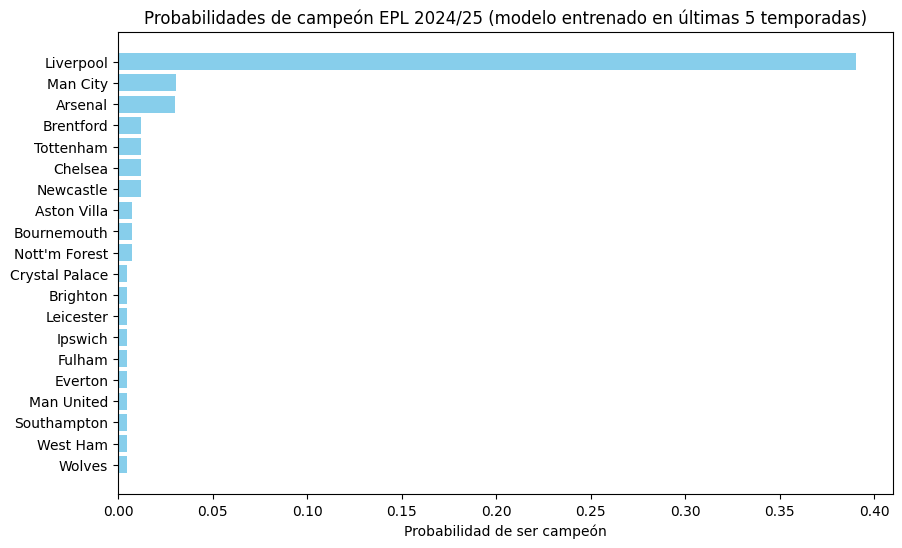

In [51]:
# ============================================
# 1. Detectar las últimas 5 temporadas
# ============================================

# Tomar las últimas 5 temporadas(ordenadas)
last_5_seasons = season_stats['Season'].unique()[-5:]
print("Últimas 5 temporadas:", last_5_seasons)

# Filtrar dataset
recent_stats = season_stats[season_stats['Season'].isin(last_5_seasons)]

# ============================================
# 2. Dataset para ML solo con últimas 5 temporadas
# ============================================
X_recent = recent_stats[['home_points','Goals_For','Goal_Diff']]
y_recent = recent_stats['Champion']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_recent, y_recent, test_size=0.2, random_state=42)

# Entrenar modelo
model_recent = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_recent.fit(X_train, y_train)

y_pred = model_recent.predict(X_test)
print("Accuracy (últimas 5 temporadas):", accuracy_score(y_test, y_pred))

# ============================================
# 3. Predecir campeón en la temporada actual
# ============================================
latest_season = recent_stats['Season'].max()
current_season = recent_stats[recent_stats['Season'] == latest_season]

X_current = current_season[['home_points','Goals_For','Goal_Diff']]
probs = model_recent.predict_proba(X_current)[:,1]
current_season['Champion_Prob'] = probs

ranking = current_season[['Team','Champion_Prob']].sort_values(by='Champion_Prob', ascending=False)
print(ranking)

# ============================================
# 4. Visualización
# ============================================
plt.figure(figsize=(10,6))
plt.barh(ranking['Team'], ranking['Champion_Prob'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Probabilidad de ser campeón")
plt.title(f"Probabilidades de campeón EPL {latest_season} (modelo entrenado en últimas 5 temporadas)")
plt.show()

8. Interpretar resultados
- Ver importancia de variables:


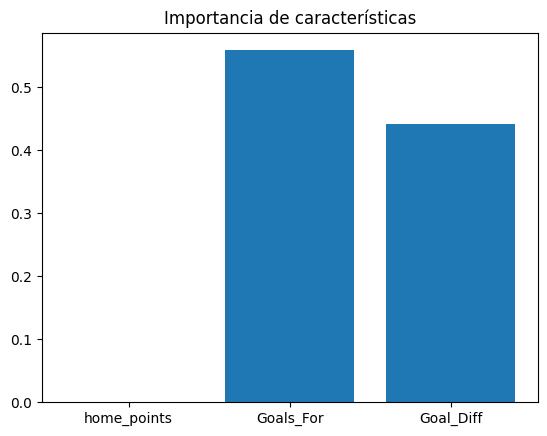

In [52]:
importances = model_recent.feature_importances_
plt.bar(X.columns, importances)
plt.title("Importancia de características")
plt.show()

🛠️ Flujo para predecir goles por equipo
1. Construir tabla de goles por temporada/equipo
Ya tienes season_stats con columnas como Goals_For, Goals_Against, Goal_Diff. Esa tabla es perfecta para entrenar un modelo de regresión.



In [53]:
# Dataset de entrenamiento
X = season_stats[['home_points','Goal_Diff']]  # features
y = season_stats['Goals_For']                  # target: goles anotados

2. Entrenar modelo de regresión
Usa un regresor como XGBoost o RandomForestRegressor:


In [54]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_goals = XGBRegressor()
model_goals.fit(X_train, y_train)

y_pred = model_goals.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 6.5562663078308105


3. Predecir goles en la temporada actual
Filtra la última temporada y aplica el modelo:


In [55]:
latest_season = season_stats['Season'].max()
current_season = season_stats[season_stats['Season'] == latest_season]

X_current = current_season[['home_points','Goal_Diff']]
predicted_goals = model_goals.predict(X_current)

current_season['Predicted_Goals'] = predicted_goals
ranking_goals = current_season[['Team','Predicted_Goals']].sort_values(by='Predicted_Goals', ascending=False)
print(ranking_goals)

               Team  Predicted_Goals
491       Liverpool        83.600220
492        Man City        67.365036
480         Arsenal        64.086205
485         Chelsea        61.270527
497       Tottenham        55.917099
481     Aston Villa        55.597763
484        Brighton        55.526817
482     Bournemouth        55.027390
494       Newcastle        54.996078
495   Nott'm Forest        50.755173
499          Wolves        50.537552
483       Brentford        50.172844
488          Fulham        49.852577
493      Man United        46.371349
486  Crystal Palace        43.882793
487         Everton        40.259586
498        West Ham        39.211327
489         Ipswich        34.912205
496     Southampton        24.970243
490       Leicester        24.544659


/tmp/ipython-input-583816800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_season['Predicted_Goals'] = predicted_goals


4. Visualización

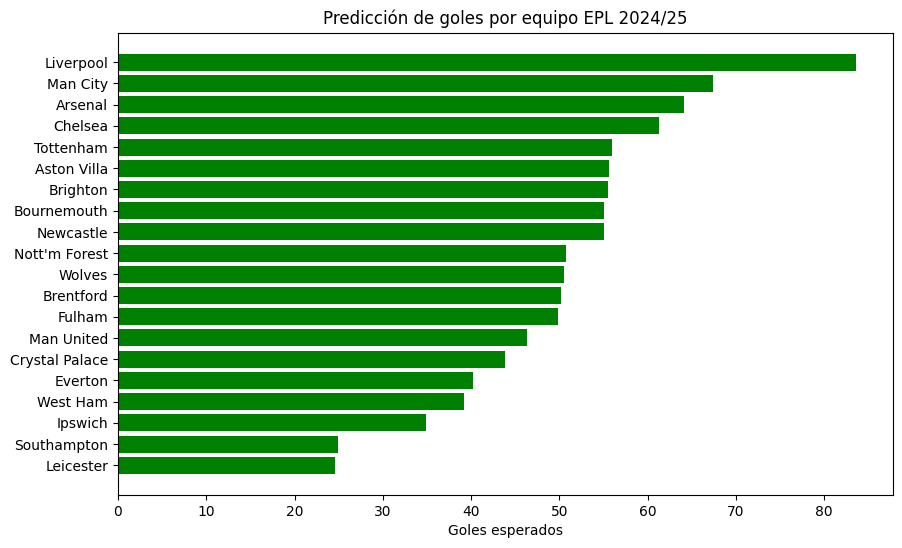

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(ranking_goals['Team'], ranking_goals['Predicted_Goals'], color='green')
plt.gca().invert_yaxis()
plt.xlabel("Goles esperados")
plt.title(f"Predicción de goles por equipo EPL {latest_season}")
plt.show()